# Importing Packages

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df=pd.read_csv(r"C:\Users\PAVAN KALYAN\Documents\Oasis projects\advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
df.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

# Data Visualization

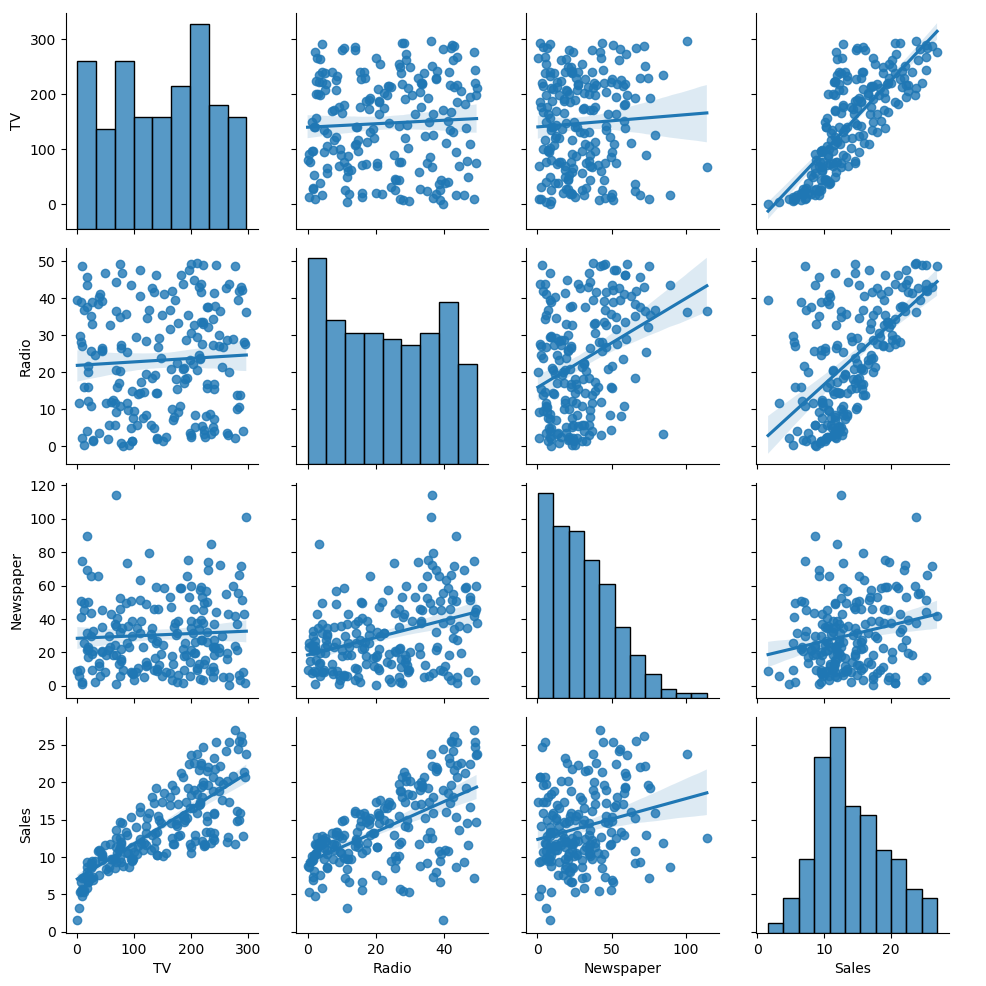

In [7]:
sns.pairplot(df.drop(columns='Unnamed: 0'), kind='reg')

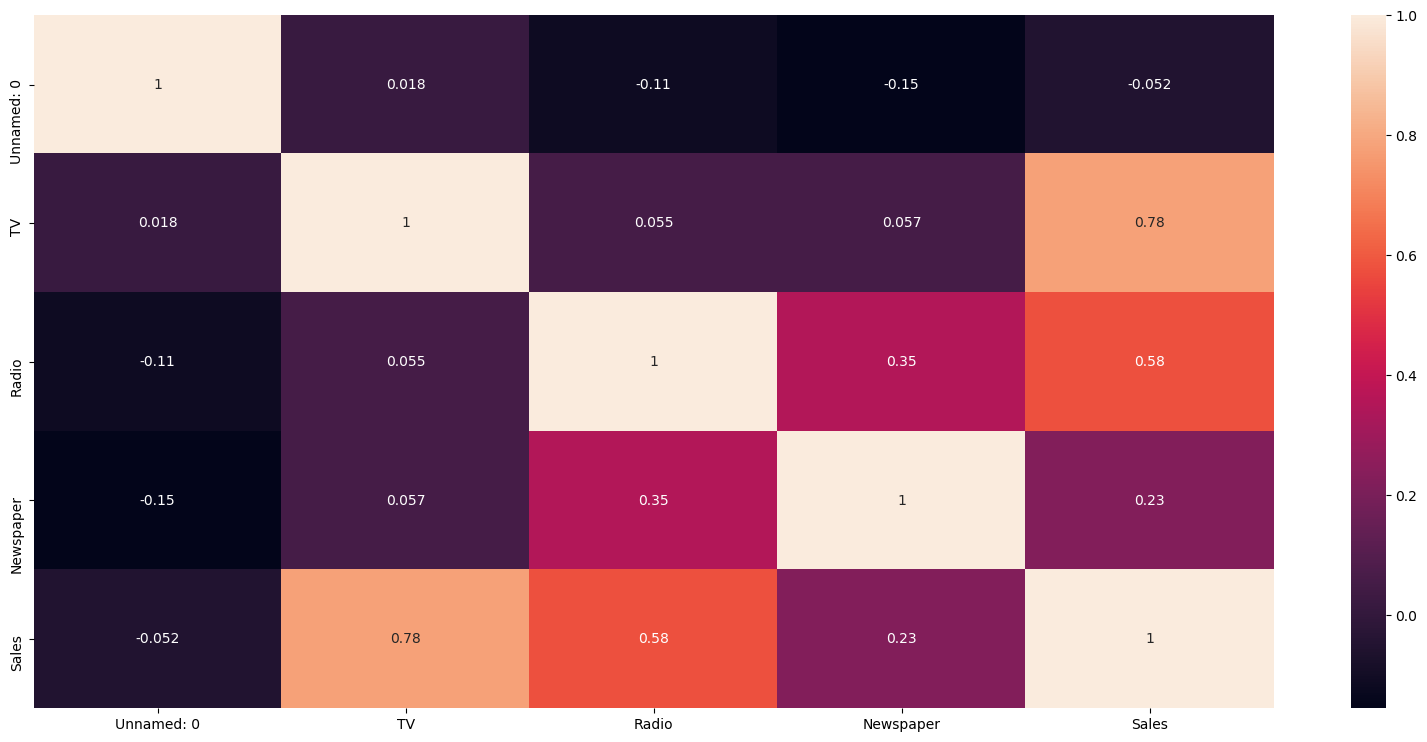

In [8]:
plt.figure(figsize=(20, 9))
sns.heatmap(df.corr(), annot=True)

In [9]:
X = df[['TV','Radio','Newspaper']]
y = df['Sales']

In [10]:
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [11]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

# Training Model

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## Linear Regression

In [13]:
regressor_lr = LinearRegression()  
regressor_lr.fit(X_train,y_train)
print("Intercept: ",regressor_lr.intercept_)
print("Coefficients:")
list(zip(X, regressor_lr.coef_))

Intercept:  2.652789668879498
Coefficients:


[('TV', 0.04542559602399794),
 ('Radio', 0.18975772766893614),
 ('Newspaper', 0.004603078953112072)]

In [14]:
y_pred_lr = regressor_lr.predict(X_test)
r2_square = r2_score(y_test,y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)

In [15]:
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')

 R-squared: 0.9058622107532246
Mean Squared Error: 1.8506819941636963


In [16]:
pred_df=pd.DataFrame({'Test Data':y_test,'Predicted Data':y_pred_lr,'Difference':y_test-y_pred_lr})
pred_df

,Test Data,Predicted Data,Difference
126,6.6,10.621601,-4.021601
104,20.7,20.006253,0.693747
99,17.2,16.918509,0.281491
92,19.4,19.170407,0.229593
111,21.8,20.949741,0.850259
167,12.2,13.122843,-0.922843
116,12.2,11.807407,0.392593
96,11.7,12.320198,-0.620198
52,22.6,20.578068,2.021932
69,22.3,20.956627,1.343373
